### **EXP-Handling Missing Value:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\PROJECTS\Swiggy Delivery Dataset\train.csv")

In [3]:
def basic_data_cleaning(df):

    df.drop(columns=['ID'],inplace=True)
    df['Restaurant_latitude'] = abs(df['Restaurant_latitude'].replace(0,np.nan))
    df['Restaurant_longitude'] = abs(df['Restaurant_longitude'].replace(0,np.nan))
    cols = ["Delivery_location_latitude","Delivery_location_longitude"]
    df.loc[df['Restaurant_latitude'].isnull(), cols] = np.nan

    columns = ["Delivery_person_Age",  "Delivery_person_Ratings","Time_Orderd", "Weatherconditions", "Road_traffic_density",
    "multiple_deliveries", "Festival", "City"]
    for i in columns:
        df[i] = df[i].replace('NaN ',np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].replace("conditions NaN",np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.split()[-1] if isinstance(x, str) else x)
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x[-2:]).astype("float")

    return df

In [4]:
df = basic_data_cleaning(df)

In [5]:
df.sample(6)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
31834,DEHRES09DEL01,21,4.5,30.332735,78.054222,30.342735,78.064222,11-02-2022,09:35:00,09:45:00,Fog,Low,0,Drinks,motorcycle,1,No,Metropolitian,17.0
31632,MUMRES13DEL02,28,4.9,19.178321,72.834715,19.198321,72.854715,01-04-2022,09:55:00,10:10:00,Windy,Low,1,Buffet,scooter,0,No,Metropolitian,12.0
21981,CHENRES05DEL02,37,4.6,13.058616,80.264151,13.188616,80.394151,23-03-2022,20:50:00,21:05:00,Sunny,Jam,2,Meal,electric_scooter,1,No,Metropolitian,16.0
28844,KNPRES05DEL02,32,4.2,26.479108,80.315042,26.559108,80.395042,14-02-2022,18:55:00,19:10:00,Stormy,Medium,0,Meal,motorcycle,0,No,Metropolitian,49.0
42173,AURGRES13DEL01,35,4.3,19.880256,75.323503,19.950256,75.393503,16-02-2022,20:10:00,20:25:00,Windy,Jam,2,Snack,electric_scooter,0,No,Urban,39.0
27163,SURRES11DEL02,22,4.6,21.157735,72.768778,21.287735,72.898778,08-03-2022,17:25:00,17:30:00,Cloudy,Medium,0,Snack,motorcycle,1,No,Urban,38.0


In [7]:
round(df.isnull().sum()/df.shape[0]*100,2)

Delivery_person_ID             0.00
Delivery_person_Age            4.07
Delivery_person_Ratings        4.18
Restaurant_latitude            7.98
Restaurant_longitude           7.98
Delivery_location_latitude     7.98
Delivery_location_longitude    7.98
Order_Date                     0.00
Time_Orderd                    3.80
Time_Order_picked              0.00
Weatherconditions              1.35
Road_traffic_density           1.32
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            2.18
Festival                       0.50
City                           2.63
Time_taken(min)                0.00
dtype: float64

<Axes: >

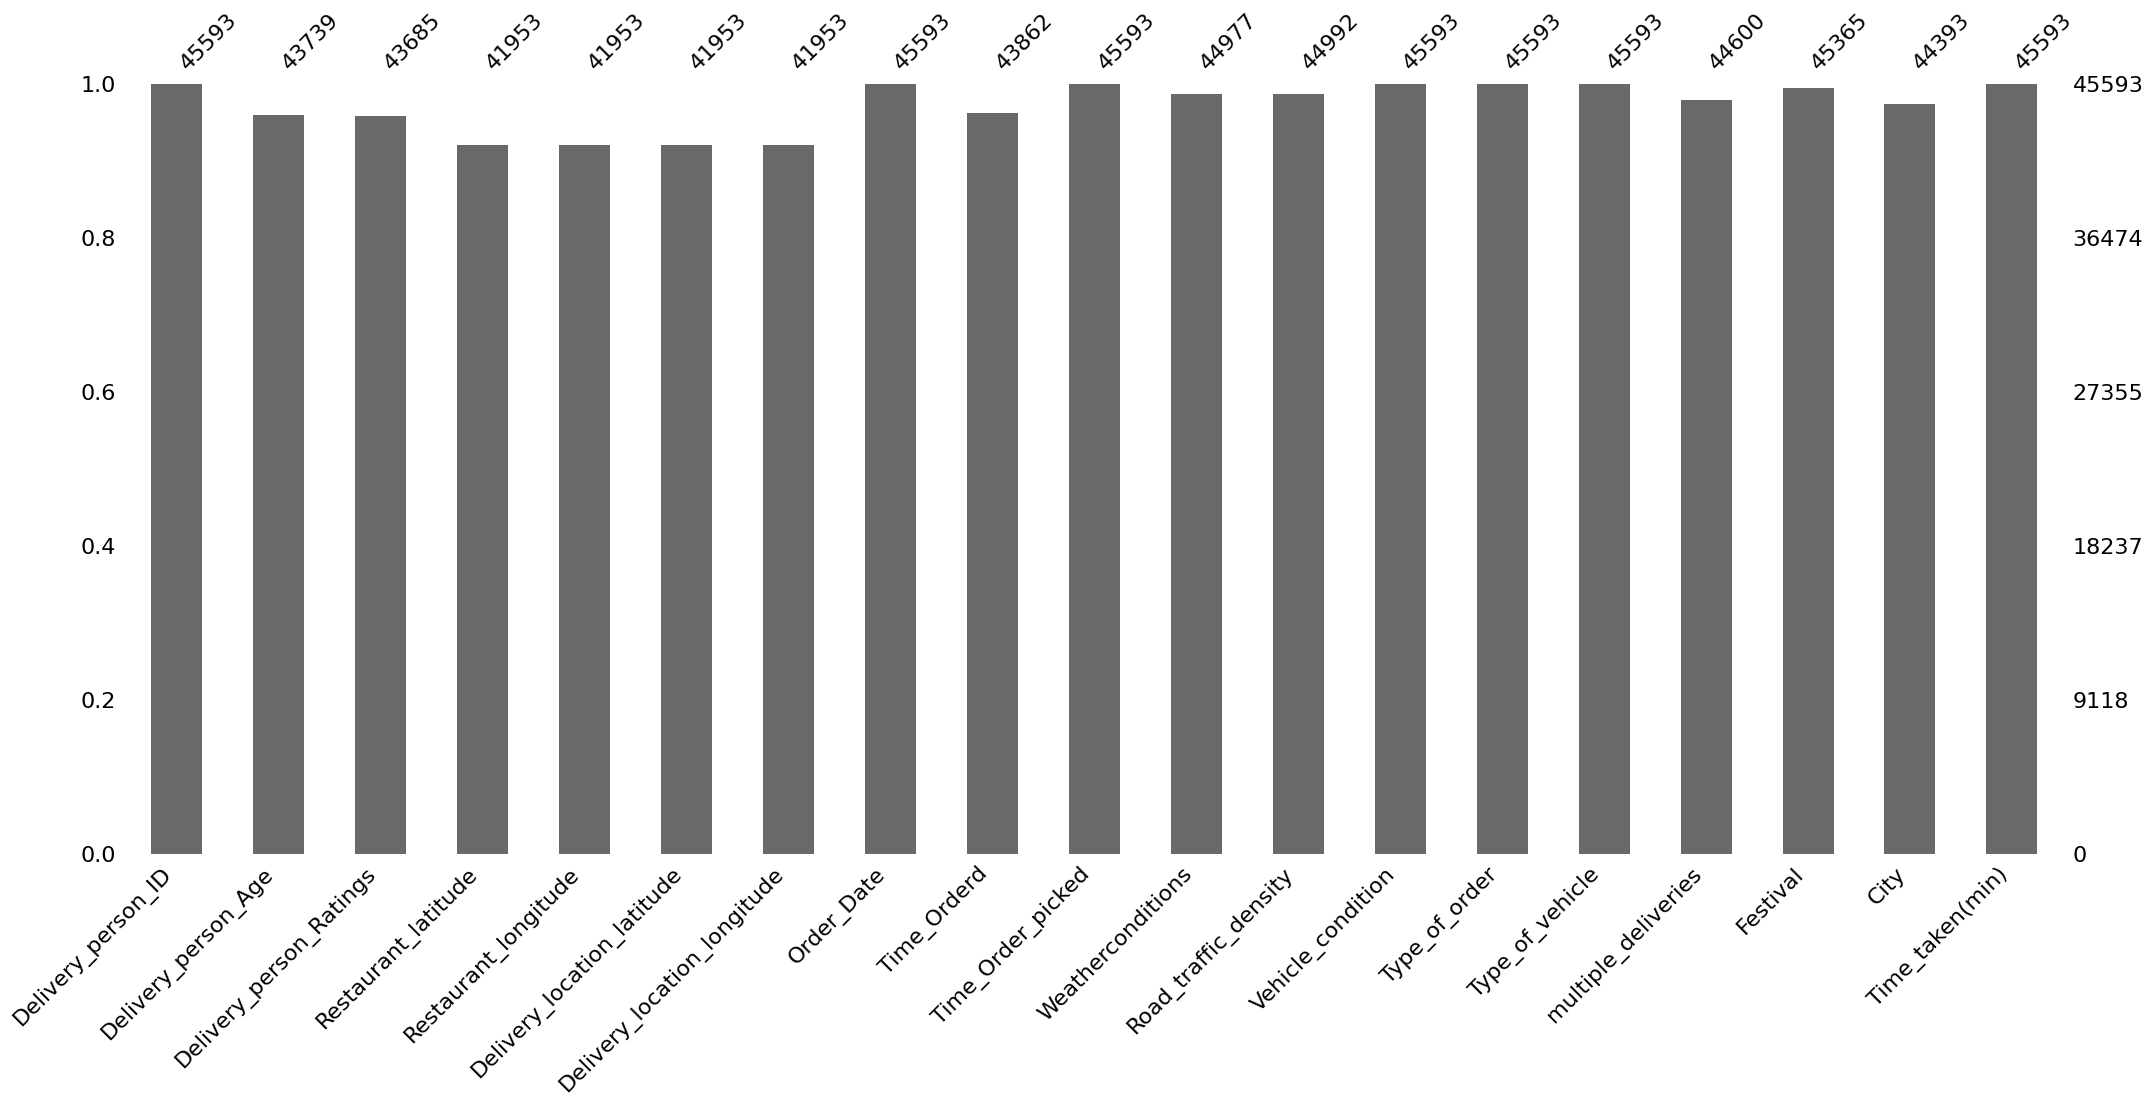

In [8]:
msn.bar(df)

<Axes: >

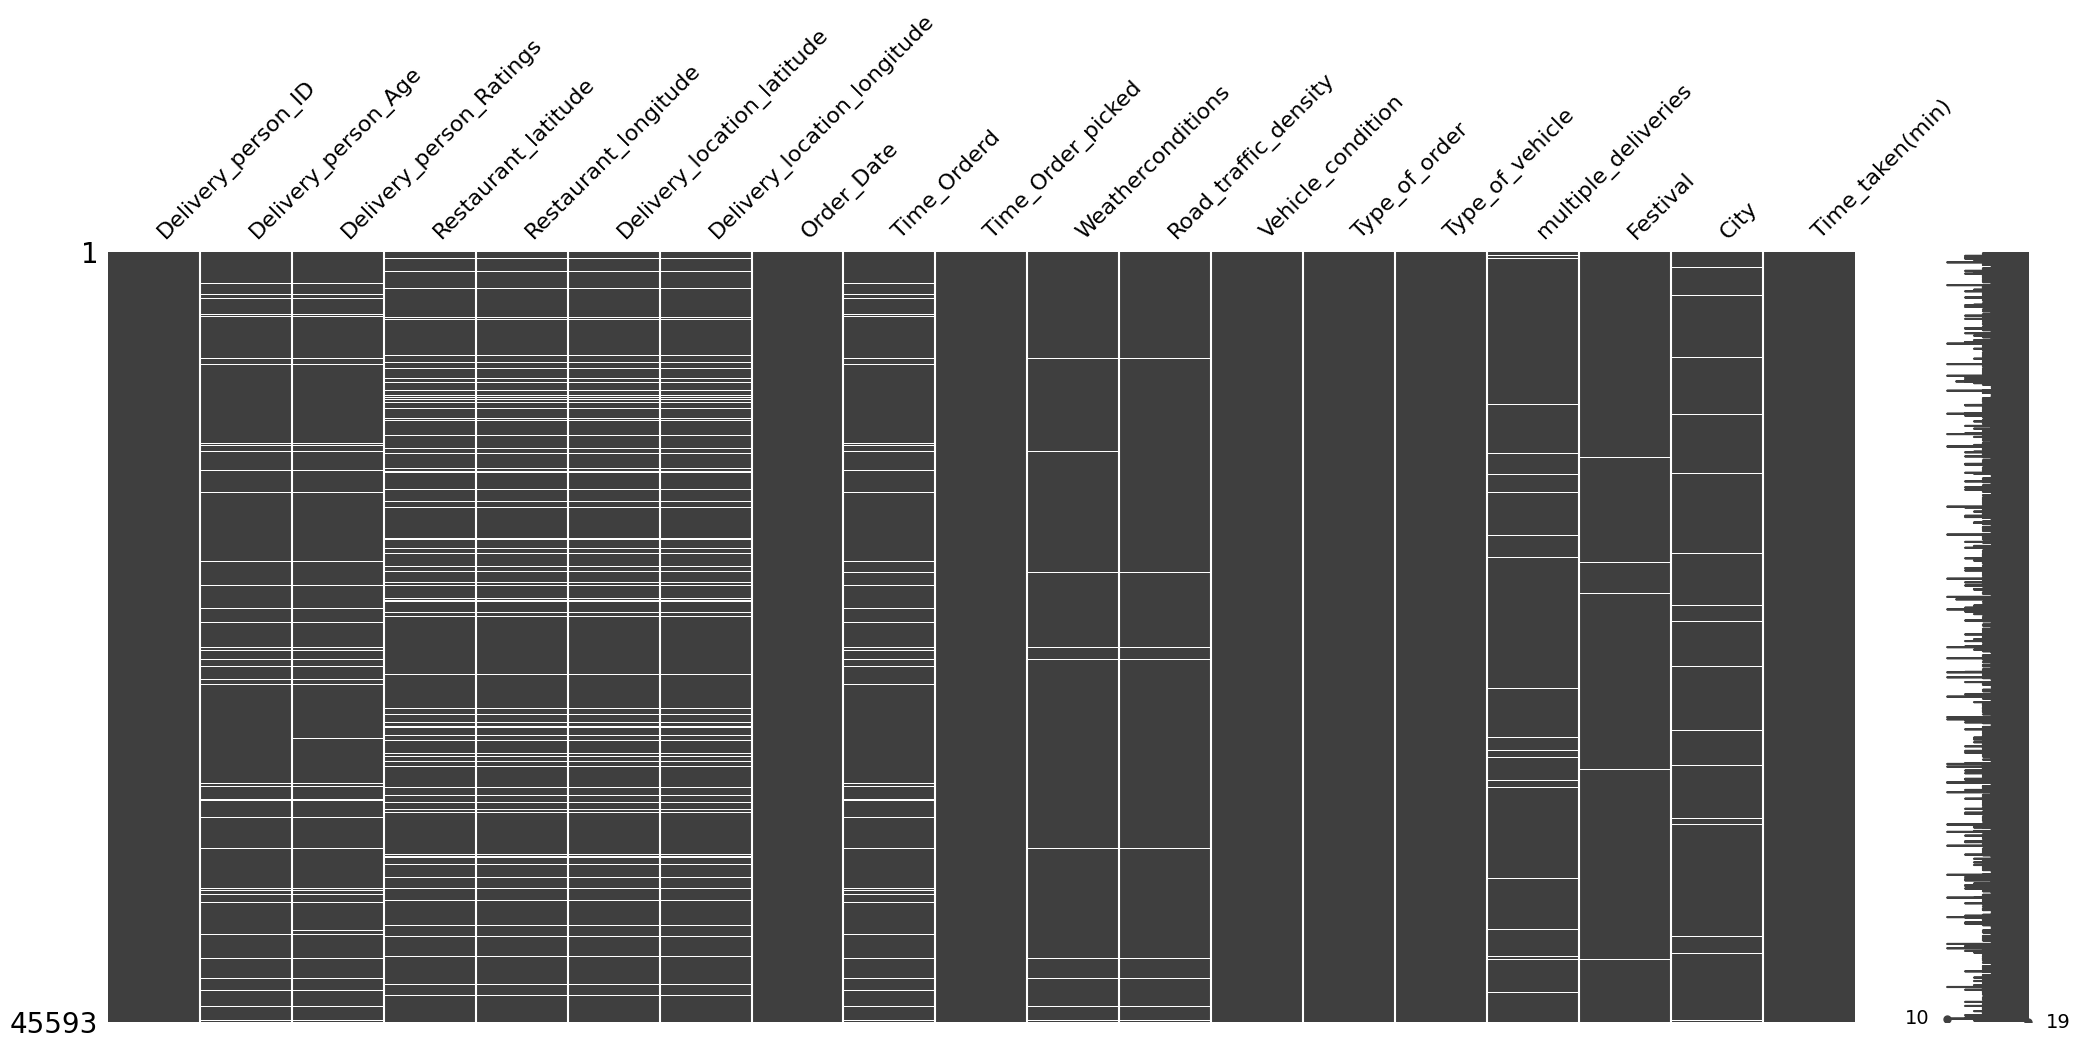

In [9]:
msn.matrix(df)

<Axes: >

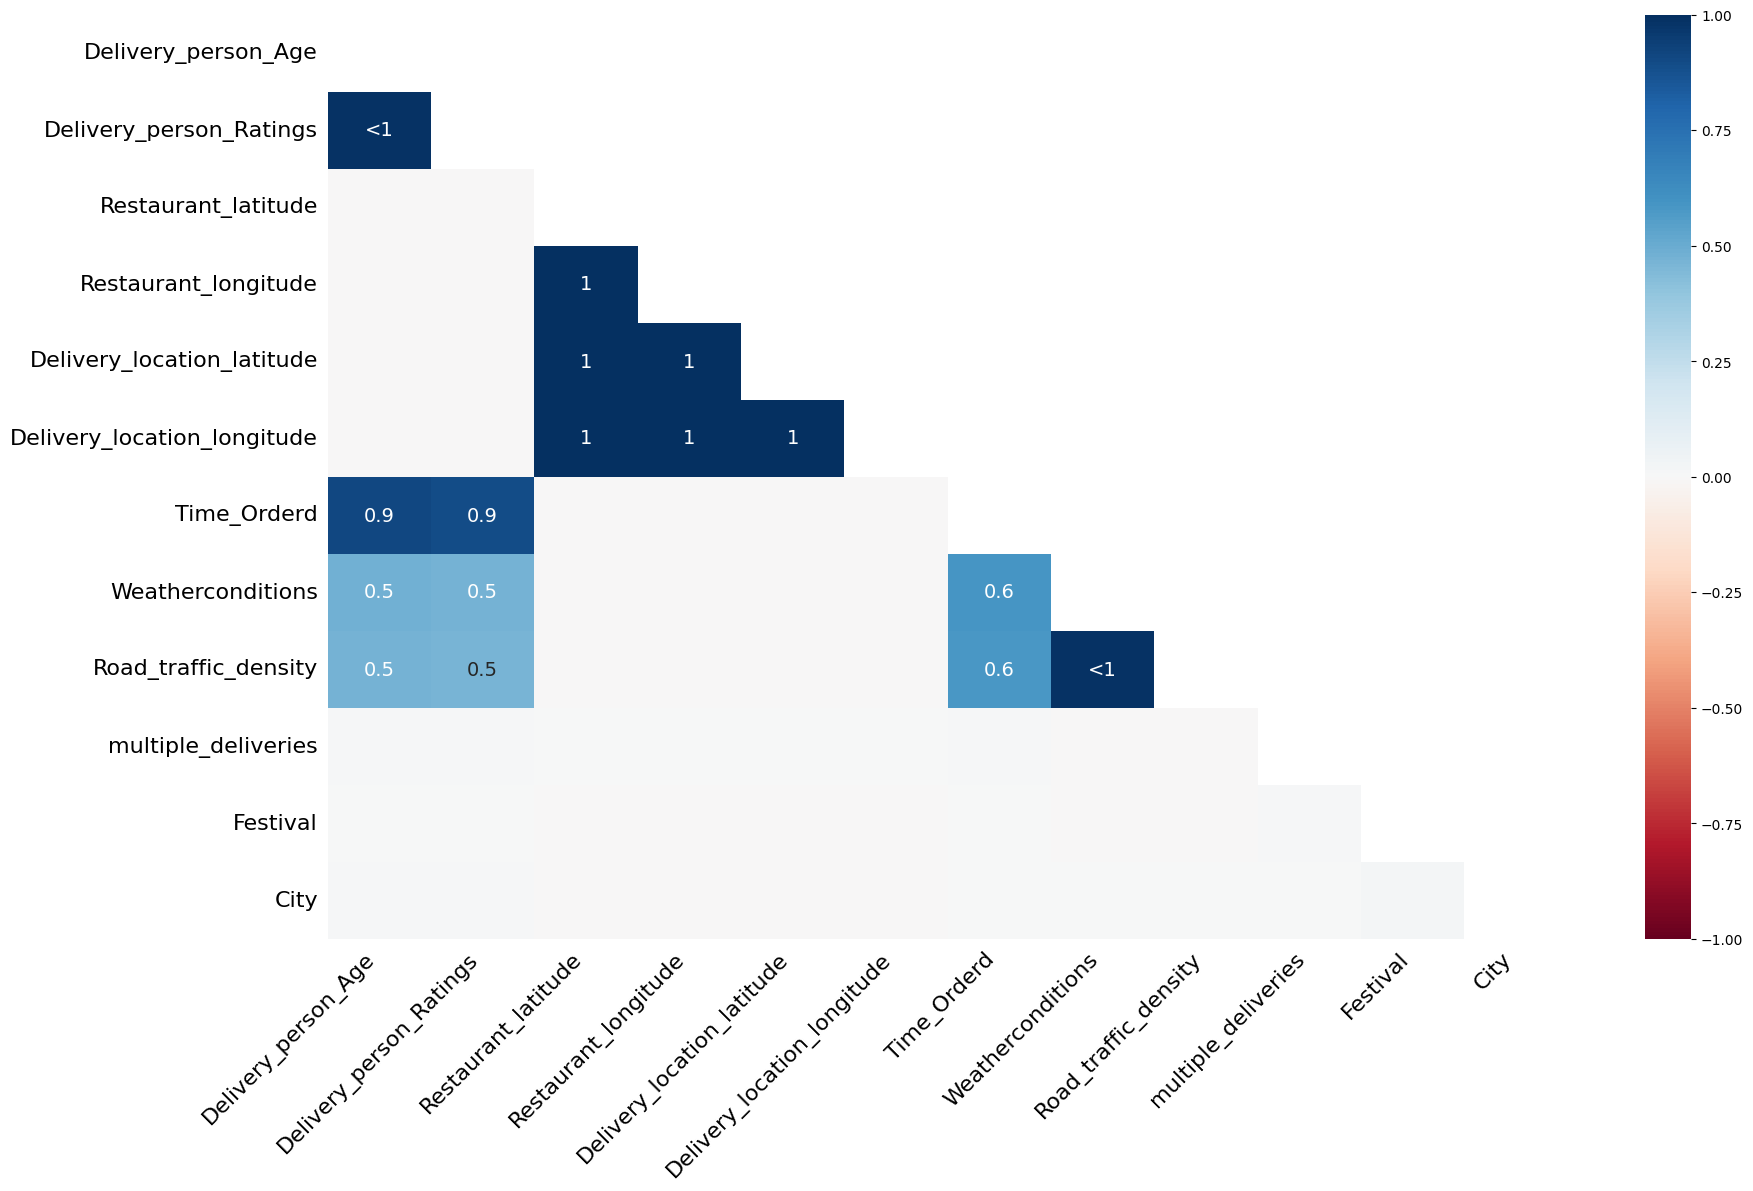

In [10]:
msn.heatmap(df)

<Axes: >

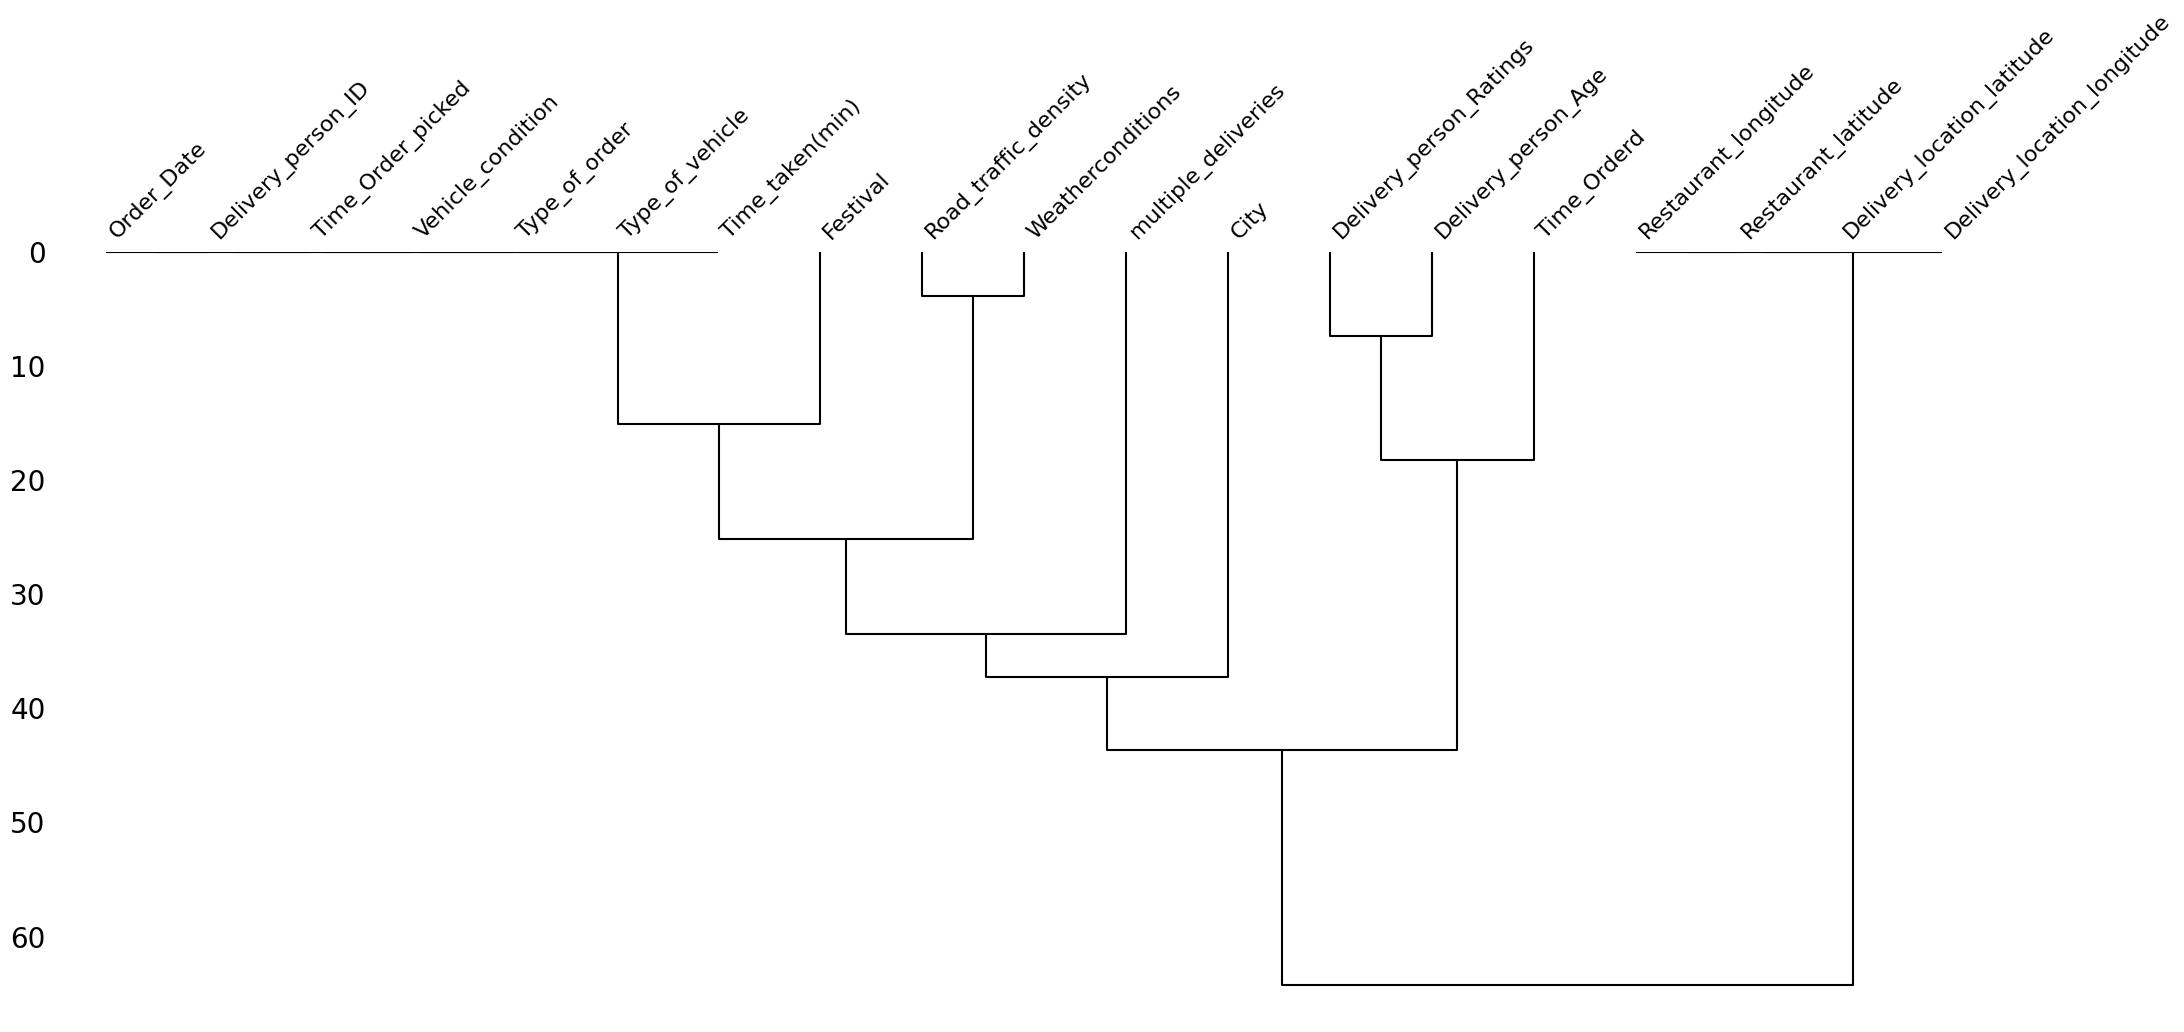

In [11]:
msn.dendrogram(df)